<a href="https://colab.research.google.com/github/ssood/DAX-TextInsights/blob/main/LIWC_Clustering_CEO_DAX_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Load the spreadsheet data
df = pd.read_csv('/sample_data/DAX40 data.csv', encoding = 'ISO-8859-1')  # Update this path to your file location

In [ ]:
 # Data Preparation: Select key variables for analysis
key_variables = ['Analytic', 'Clout', 'Authentic', 'Tone']
df_clustering = df[key_variables].dropna()

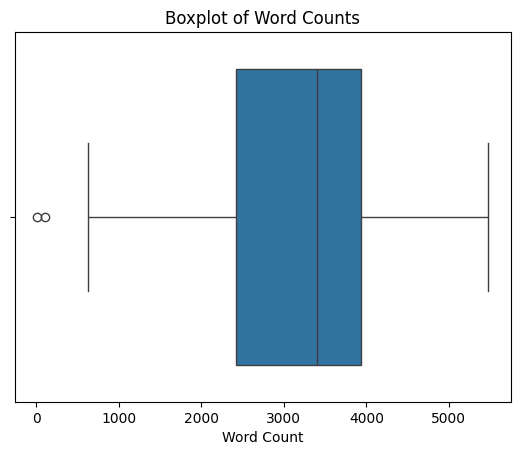

In [ ]:
# Identify and handle outliers
# Using Word Count (WC) as an example metric for outlier detection
sns.boxplot(x=df['WC'])
plt.title('Boxplot of Word Counts')
plt.xlabel('Word Count')
plt.show()

In [ ]:
# Outlier Detection (You might adjust criteria based on your analysis needs)
extreme_wc = df[df['WC'] > df['WC'].quantile(0.95)]
print("Entries with extreme Word Counts:", extreme_wc[['DAX Company', 'WC']])


Entries with extreme Word Counts:        DAX Company    WC
18          Henkel  5479
25  Rheinmetall AG  5101


In [ ]:
# Data Standardization
scaler = StandardScaler()

In [ ]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
# Create a pipeline
pipeline = make_pipeline(scaler, kmeans)


In [ ]:
# Fitting the model to the data
pipeline.fit(df_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [ ]:
# Predicting the cluster labels
labels = pipeline.predict(df_clustering)

In [ ]:
# Adding the cluster labels to the dataframe
df_clustering['Cluster'] = labels

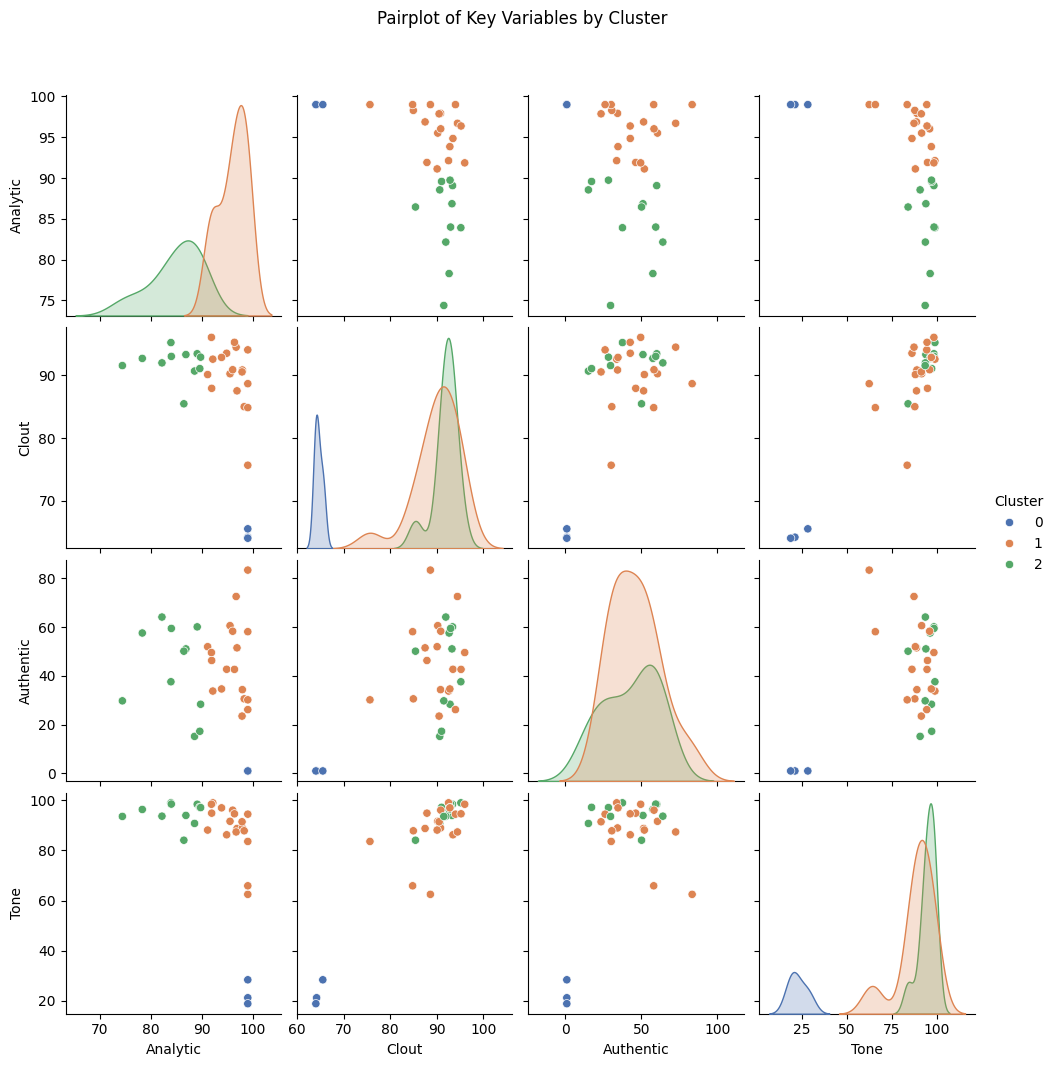

In [ ]:
# Visualizing the clusters with a pairplot
sns.pairplot(df_clustering, hue='Cluster', palette='deep', diag_kind='kde', vars=key_variables)
plt.suptitle('Pairplot of Key Variables by Cluster', verticalalignment='baseline', horizontalalignment='center', y=1.05)
plt.show()


In [ ]:
# Analyzing cluster characteristics
cluster_means = df_clustering.groupby('Cluster').mean()
print(cluster_means)

          Analytic      Clout  Authentic       Tone
Cluster                                            
0        99.000000  64.610000   1.000000  22.813333
1        95.962222  90.031111  46.179444  88.714444
2        84.814545  91.904545  42.803636  94.790909
